In [1]:
from os import listdir

import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

from matplotlib import pyplot as plt

from ipynb.fs.full.GenerateLogs import generate_log, get_data, do_chinese_whispers

# Get ideal Chinese Whispers parameters

In [17]:
data_df = get_data(['celeb_a_1', 'celeb_a_2'])

log = data_df
# log = generate_log(data_df, log_length=2000, n_faces=600, exact=False)
log['randID'] = np.random.randint(100000, 999999, log.shape[0]).astype(str)
log['randID'] = log['id'] + log['randID']

d = log.drop(columns='id').set_index('randID').T.to_dict('list')

Dataset contains 40995 images of 2000 different people 



In [9]:
est_errors = []
for threshold in np.arange(1, 121, 10):
    cw_clusters = do_chinese_whispers(d, threshold=threshold)
        
    n_people = len(log['id'].value_counts().keys())
    n_clusters = len(cw_clusters.keys())

    est_error = (abs(n_clusters - n_people) / n_people) * 100
    est_errors.append(est_error)

    print('threshold: %f, people: %d clusters: %d error: %f' % (threshold, n_people, n_clusters, est_error))

threshold: 1.000000, people: 541 clusters: 1 error: 99.815157
threshold: 11.000000, people: 541 clusters: 1 error: 99.815157
threshold: 21.000000, people: 541 clusters: 1 error: 99.815157
threshold: 31.000000, people: 541 clusters: 1 error: 99.815157
threshold: 41.000000, people: 541 clusters: 3 error: 99.445471
threshold: 51.000000, people: 541 clusters: 129 error: 76.155268
threshold: 61.000000, people: 541 clusters: 352 error: 34.935305
threshold: 71.000000, people: 541 clusters: 527 error: 2.587800
threshold: 81.000000, people: 541 clusters: 663 error: 22.550832
threshold: 91.000000, people: 541 clusters: 831 error: 53.604436
threshold: 101.000000, people: 541 clusters: 1153 error: 113.123845
threshold: 111.000000, people: 541 clusters: 1606 error: 196.857671


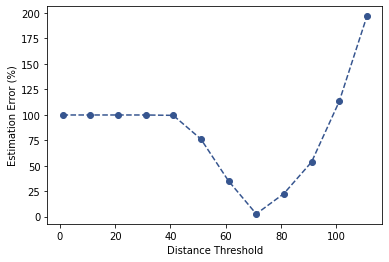

In [12]:
# Plot graph
plt.plot(np.arange(1, 121, 10), est_errors, color='#36558F', linestyle='dashed', marker='o')
plt.xlabel('Distance Threshold')
plt.ylabel('Estimation Error (%)')
plt.savefig('cw-parameter-estimation-1.png', bbox_inches='tight', dpi=200)
plt.show()

### Zoomed in

In [18]:
est_errors = []
for threshold in np.arange(65, 75, 1):
    cw_clusters = do_chinese_whispers(d, threshold=threshold)
        
    n_people = len(log['id'].value_counts().keys())
    n_clusters = len(cw_clusters.keys())

    est_error = (abs(n_clusters - n_people) / n_people) * 100
    est_errors.append(est_error)

    print('threshold: %f, people: %d clusters: %d error: %f' % (threshold, n_people, n_clusters, est_error))

KeyboardInterrupt: 

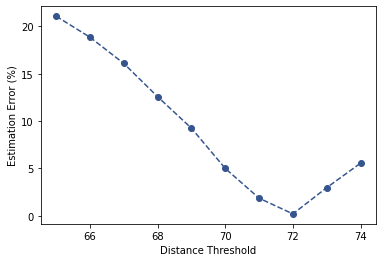

In [16]:
# Plot graph
plt.plot(np.arange(65, 75, 1), est_errors, color='#36558F', linestyle='dashed', marker='o')
plt.xlabel('Distance Threshold')
plt.ylabel('Estimation Error (%)')
plt.savefig('cw-parameter-estimation-2.png', bbox_inches='tight', dpi=200)
plt.show()